In [1]:
import numpy as np
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
imagen = Image.open('img/jupiter.jpeg')
imagen_array = np.array(imagen)

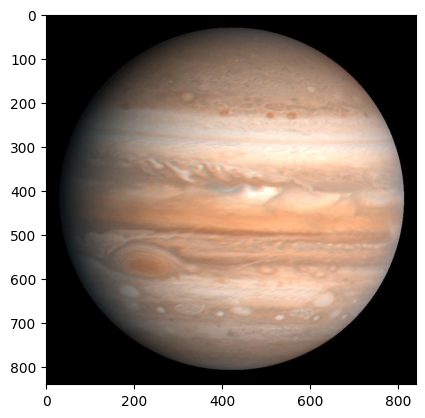

In [3]:
plt.imshow(imagen)
plt.show()

imagen.save('salidas/jupiter_copia.png')

In [4]:
print("primer pixel de la imagen ", imagen_array[0,0])


primer pixel de la imagen  [0 0 0]


In [5]:
imagen_recortada_array = imagen_array[200:400, 200:400]
imagen_recortada = Image.fromarray(imagen_recortada_array.astype('uint8'))

# plt.imshow(imagen_recortada)
# plt.show()

# imagen_recortada.save('salidas/jupiter_recortada.png')

In [40]:
mask = np.zeros(imagen_array.shape[:2], np.uint8)
mask[100:300, 100:400] = 1
masked_img=cv2.bitwise_and(imagen_array,imagen_array,mask= mask)

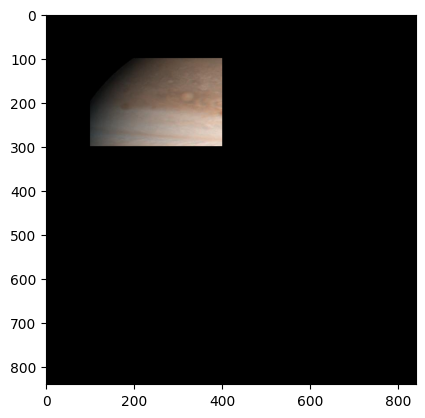

In [41]:
plt.imshow(masked_img.astype('uint8'))
plt.show()

In [10]:
## color medio de la imagen dentro de la mascara
mean_color = np.mean(imagen_array[mask == 255], axis=0) 
#cantidad de pixeles dentro de la mascara
print("cantidad de pixeles dentro de la mascara", np.sum(mask == 255))
print("color medio", mean_color)

cantidad de pixeles dentro de la mascara 60000
color medio [118.40933333 103.26925     92.38331667]


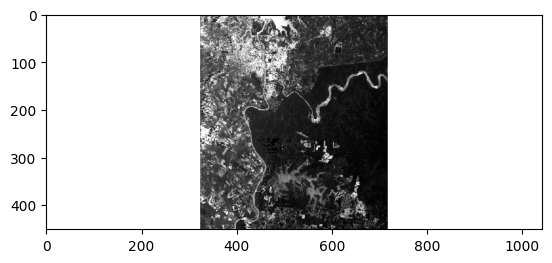

In [47]:
imagen_lc = Image.open('img/LC08_224-078_2018-01-05_blue.tif')

plt.imshow(imagen_lc)
plt.show()

In [48]:
imagen_lc_array = np.array(imagen_lc)

mask = np.zeros(imagen_lc_array.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img=cv2.bitwise_and(imagen_lc_array,imagen_lc_array,mask= mask)


In [49]:
imagen_lc_array.shape

(451, 1042, 4)

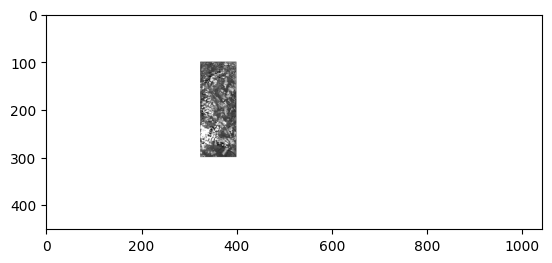

In [50]:
plt.imshow(masked_img.astype('uint8'))
plt.show()

In [51]:
#color medio de la imagen dentro de la mascara
mean_color = np.mean(imagen_lc_array[mask == 255], axis=0)
#cantidad de pixeles dentro de la mascara
print("cantidad de pixeles dentro de la mascara", np.sum(mask == 255))
print("color medio", mean_color)


cantidad de pixeles dentro de la mascara 60000
color medio [28.23188333 28.23188333 28.23188333 64.566     ]


PUNTO 4
FUNCION GAMMA

In [94]:
def ajuste_gamma(imagen,gamma):
    imagenresultado=255*((imagen/255)**gamma)
    imagenresultado=imagenresultado.astype('uint8')
    return imagenresultado

img = cv2.imread('img/jupiter.jpeg', 0)

img_gamma_05 = ajuste_gamma(img, 0.5)
img_gamma_15 = ajuste_gamma(img, 1.5)


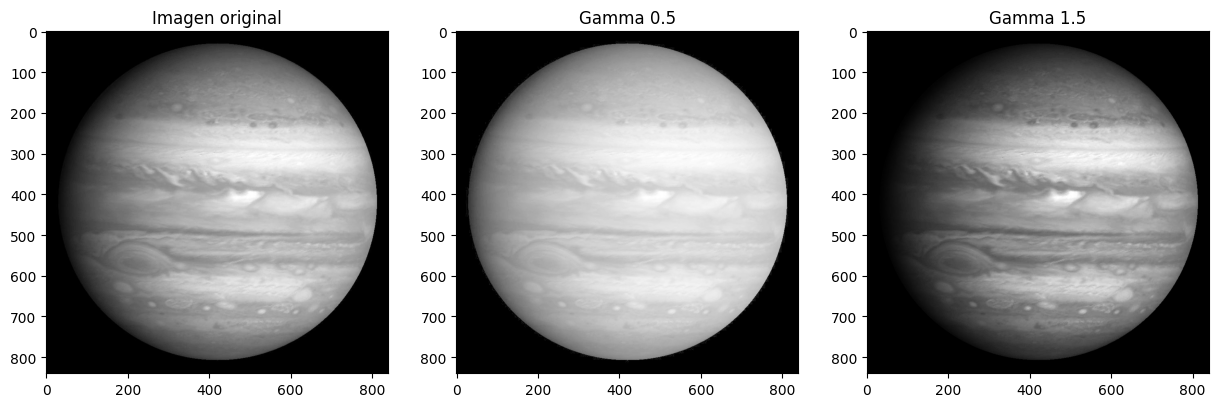

In [95]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Imagen original')
ax2.imshow(img_gamma_05, cmap='gray')
ax2.set_title('Gamma 0.5')
ax3.imshow(img_gamma_15, cmap='gray')
ax3.set_title('Gamma 1.5')
plt.show()


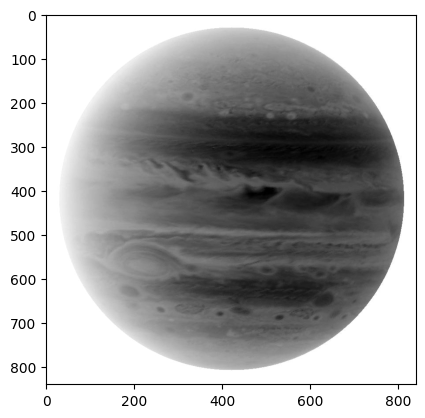

In [96]:
# negativo de la imagen
img_negativo = 255 - img

plt.imshow(img_negativo, cmap='gray')
plt.show()
